<a href="https://colab.research.google.com/github/nouman23t/chatbot/blob/main/Copy_of_GTSRB_German_Traffic_Sign_Recognition_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
meowmeowmeowmeowmeow_gtsrb_german_traffic_sign_path = kagglehub.dataset_download('meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

print('Data source import complete.')


Using Colab cache for faster access to the 'gtsrb-german-traffic-sign' dataset.
Data source import complete.


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import pathlib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')



In [16]:
data_dir = "/kaggle/input/gtsrb-german-traffic-sign"
train_csv = pd.read_csv(os.path.join(data_dir, "Train.csv"))


In [18]:
x, y = [], []

for index, row in train_csv.iterrows():
    image_path = os.path.join(data_dir, row['Path'])
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    x.append(image)
    y.append(row['ClassId'])


In [19]:
x = np.array(x) / 255.0


In [20]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
X_train.shape, X_test.shape

((31367, 32, 32, 3), (7842, 32, 32, 3))

In [23]:
generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1
)


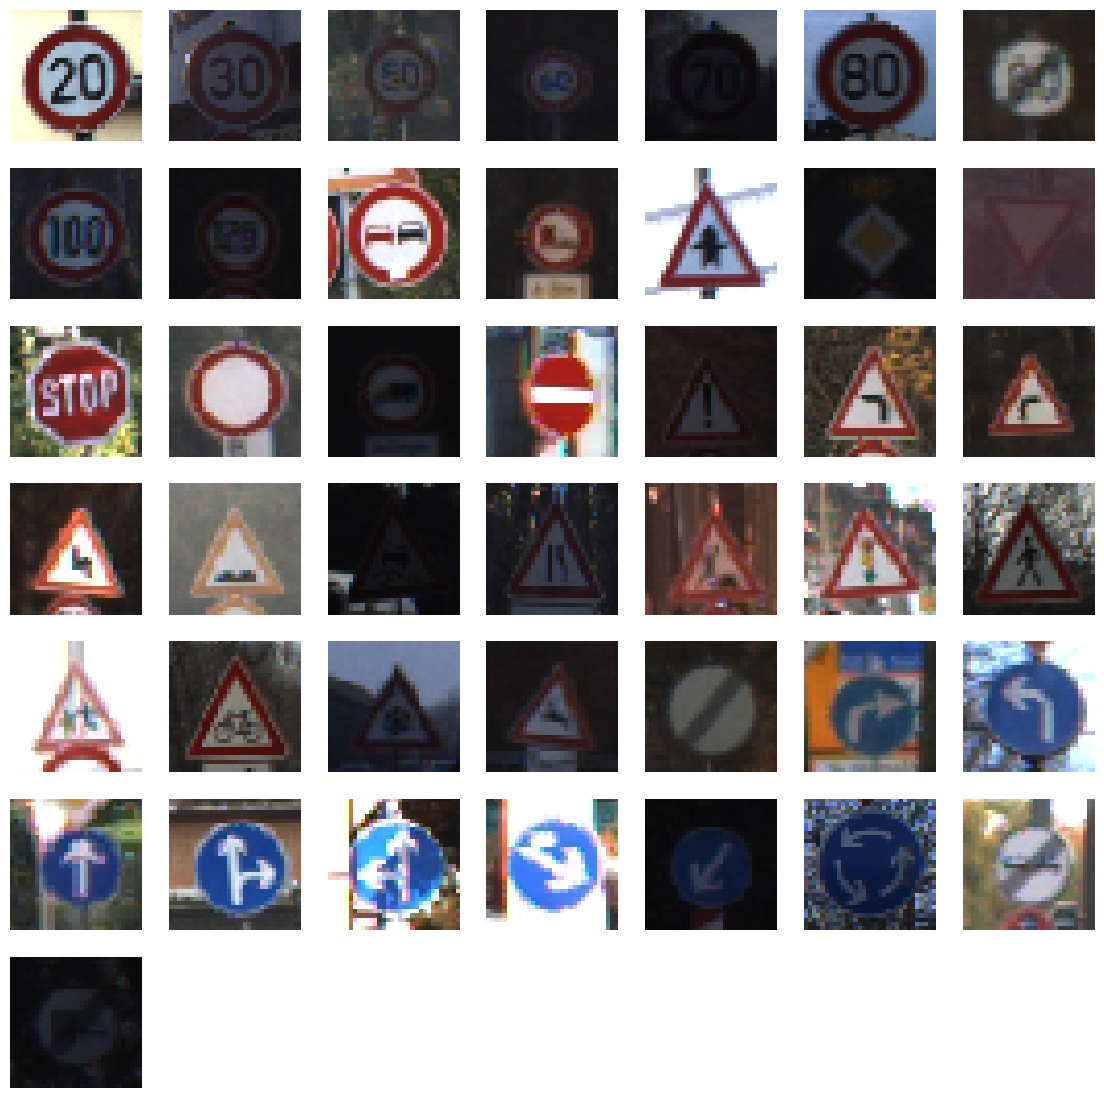

In [24]:
NUM_CATEGORIES = 43
IMG_WIDTH, IMG_HEIGHT = 32, 32
train_path = os.path.join(data_dir, 'Train')
img_dir = pathlib.Path(train_path)

plt.figure(figsize=(14, 14))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i + 1)
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
    plt.axis('off')  # optional, hides axes
plt.show()


Model Architecture

In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])


In [26]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the **model**

In [27]:
history = model.fit(
    generator.flow(X_train, Y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, Y_test)
)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.2336 - loss: 2.8109 - val_accuracy: 0.7613 - val_loss: 0.8089
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.6331 - loss: 1.1360 - val_accuracy: 0.8947 - val_loss: 0.3938
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.7527 - loss: 0.7515 - val_accuracy: 0.9450 - val_loss: 0.2236
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 71ms/step - accuracy: 0.8082 - loss: 0.5883 - val_accuracy: 0.9572 - val_loss: 0.1495
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 71ms/step - accuracy: 0.8397 - loss: 0.4898 - val_accuracy: 0.9740 - val_loss: 0.1060
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.8724 - loss: 0.3982 - val_accuracy: 0.9809 - val_loss: 0.0930
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.8872 - loss: 0.3489 - val_accuracy: 0.9871 - val_loss: 0.0555
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9034 - loss: 0.3043 - 

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9924 - loss: 0.0313
Test Accuracy: 0.9919663071632385
Test Loss: 0.03419250249862671


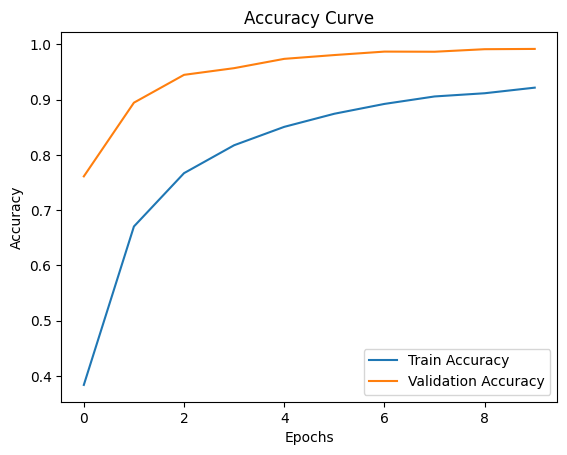

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


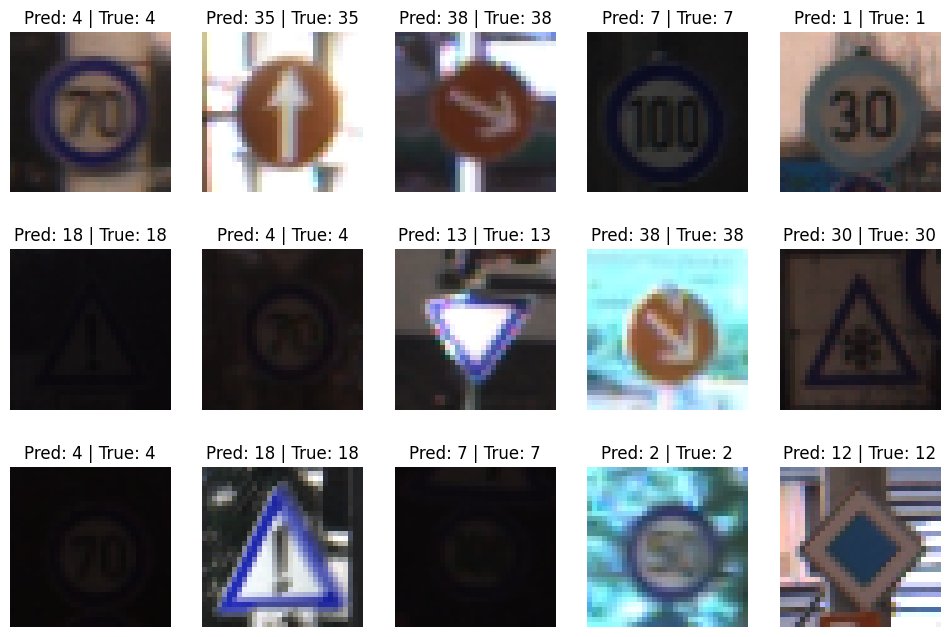

In [30]:
def predict_sample_images():
    fig, axes = plt.subplots(3, 5, figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        img = X_test[i]
        true_label = np.argmax(Y_test[i])  # Fixed: use Y_test (your one-hot labels)
        pred_label = np.argmax(model.predict(img.reshape(1, 32, 32, 3), verbose=0))
        ax.imshow(img)
        ax.set_title(f"Pred: {pred_label} | True: {true_label}")
        ax.axis('off')
    plt.show()

predict_sample_images()
